# Principal Component Analysis

Principal component analysis (PCA) is a statistical procedure to describe a set of multivariate data of possibly correlated variables by relatively few numbers of linearly uncorrelated variables.


As Richard Feynman pointed out, "What I cannot buid, I do not understand", and so to gain a well-rounded understanding of PCA we're going to try building it from scratch using NumPy. Let's import NumPy, Pandas(for reading data), MatPlotLib(for visualizing data) 

In [1]:
import numpy as np
import matplotlib as mpl
import pandas as pd

We'll use the Wicinson Iris Dataset for PCA. 

In [2]:
df = pd.read_csv(filepath_or_buffer="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                header=None,
                sep=',');
df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True)
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
X = df.iloc[:,0:4].values
Y = df.iloc[:,4].values

Our iris dataset is now stored in form of a 150×4 matrix where the columns are the different features, and every row represents a separate flower sample. Each sample row x can be pictured as a 4-dimensional vector.

## How to construct principal components:

Step 1: from the dataset, standardize the variables so that all variables are represented in a single scale

Step 2: construct variance-covariance matrix of those variables

Step 3: Calculate the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the components of the dataset

Step 4: Reorder the matrix by eigenvalues, highest to lowest. This gives the components in order of significance

Step 5: Keep the top n-components which together explain 75%-80% variability of the dataset

Step 6: create a feature vector by taking the eigenvectors that are kept in step 5, and forming a matrix with these eigenvectors in the columns

Step7: take the transpose of the feature vector and multiply it on the left of the original data set, transposed. The values obtained are the principal scores

## Standardizing the data

If the different parameters in the dataset are measured in different scales it becomes compulsary to standardize the data. However this is not the case with our Iris dataset but standardizing data increases the performance of many Machine Learning algorithms so it should be done. A standard matrix has $mean = 0$ and $variance =  1$

In [4]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

## Finding the covariance matrix of X


$Xcov = X^T.X$

In [5]:
X_cov = np.transpose(X).dot(X)

## Calculating Eigen values and Eigen vectors

In [6]:
eig_vals, eig_vecs = np.linalg.eig(X_cov)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[436.62271256 138.18313961  22.10299175   3.09115609]


## Selecting Principal Components

In [7]:
sum_of_ev = 0
for i in eig_vals:
    sum_of_ev = sum_of_ev+i
var1 = eig_vals[0]/sum_of_ev  
var2 = eig_vals[1]/sum_of_ev
var3 = eig_vals[2]/sum_of_ev
var4 = eig_vals[3]/sum_of_ev
print ('Due to PC1 : %s ' %(var1*100))
print ('Due to PC2 : %s ' %(var2*100))
print ('Due to PC3 : %s ' %(var3*100))
print ('Due to PC4 : %s ' %(var4*100))

Due to PC1 : 72.77045209380134 
Due to PC2 : 23.03052326768062 
Due to PC3 : 3.6838319576273952 
Due to PC4 : 0.5151926808906373 


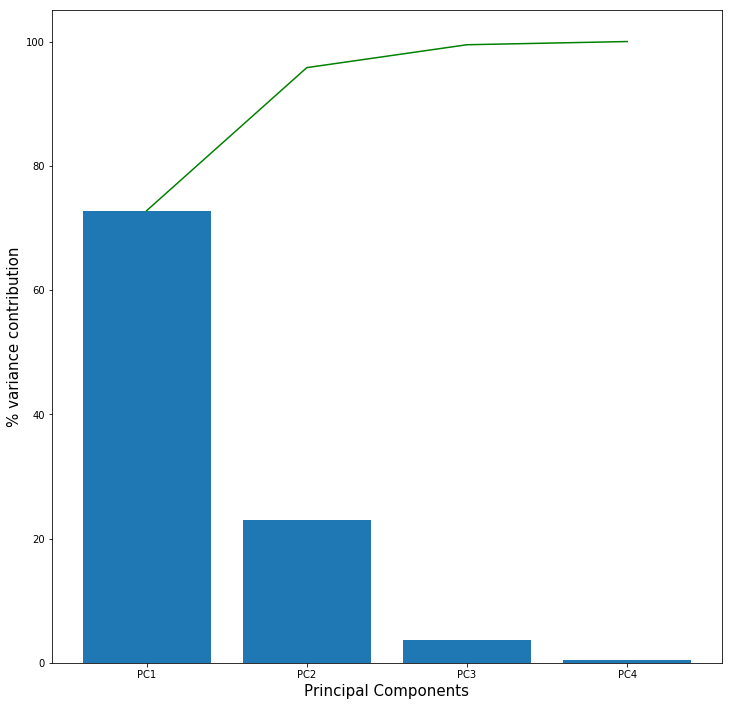

In [9]:
import matplotlib.pyplot as plt
PC = [var1*100 , var2*100 , var3*100 , var4*100]
totalVar = [var1*100 , (var1+var2)*100 , (var1+var2+var3)*100 , (var1+var2+var3+var4)*100]
index = np.arange(len(PC))
label = ['PC1','PC2','PC3','PC4']
plt.figure(figsize=(12,12))
plt.bar(index,PC)
plt.xlabel('Principal Components', fontsize=15)
plt.ylabel('% variance contribution', fontsize=15)
plt.xticks(index, label, fontsize=10)
plt.plot(label, totalVar , color='green')
plt.show()

As we can see that Principal Component 1(PC1) contributes 72.77% to the variance of the dataset whereas PC2, PC3, PC4 contribute 23.03%, 3.68% and 0.52% respectively. From his data conclusion can be drawn that PC1 and PC2 combined contribute 95.80% variance to the data and therefore PC3 and PC4 can be neglected 

In [10]:
W = np.transpose([eig_vecs[:,0],eig_vecs[:,1]])
print (np.matrix(W))

[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


## Calculating Principal Scores


$T = X.W$

In [11]:
T = X.dot(W)
print (np.matrix(T))

[[-2.26454173e+00 -5.05703903e-01]
 [-2.08642550e+00  6.55404729e-01]
 [-2.36795045e+00  3.18477311e-01]
 [-2.30419716e+00  5.75367713e-01]
 [-2.38877749e+00 -6.74767397e-01]
 [-2.07053681e+00 -1.51854856e+00]
 [-2.44571134e+00 -7.45626750e-02]
 [-2.23384186e+00 -2.47613932e-01]
 [-2.34195768e+00  1.09514636e+00]
 [-2.18867576e+00  4.48629048e-01]
 [-2.16348656e+00 -1.07059558e+00]
 [-2.32737775e+00 -1.58587455e-01]
 [-2.22408272e+00  7.09118158e-01]
 [-2.63971626e+00  9.38281982e-01]
 [-2.19229151e+00 -1.88997851e+00]
 [-2.25146521e+00 -2.72237108e+00]
 [-2.20275048e+00 -1.51375028e+00]
 [-2.19017916e+00 -5.14304308e-01]
 [-1.89407429e+00 -1.43111071e+00]
 [-2.33994907e+00 -1.15803343e+00]
 [-1.91455639e+00 -4.30465163e-01]
 [-2.20464540e+00 -9.52457317e-01]
 [-2.77416979e+00 -4.89517027e-01]
 [-1.82041156e+00 -1.06750793e-01]
 [-2.22821750e+00 -1.62186163e-01]
 [-1.95702401e+00  6.07892567e-01]
 [-2.05206331e+00 -2.66014312e-01]
 [-2.16819365e+00 -5.52016495e-01]
 [-2.14030596e+00 -3

Congratulations!! we have  successfully completed our PCA and reduced 150x4 matrix into a 150x2 matrix retaining 95.80% variance of data. 